In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import*
init_printing()

## Weak formulation for FEM

Give the heat equation
$$
\partial_t  T = k a \nabla^2 T + a \dot{Q}
$$
where $a=\frac{1}{c \rho}$ we can use the weak formulation by multiplying with a test function $u$ and integrating over the the domain $\Omega$
$$
\int_{\Omega} \partial_t  T v\, \mathrm{d}\Omega = \int_{\Omega} k a \nabla^2 T v\, \mathrm{d}\Omega + \int_{\Omega}a \dot{Q} v\, \mathrm{d}\Omega.
$$ 
For a temporaly steady heat equation we get
$$
\int_{\Omega} \nabla^2 T v\, \mathrm{d}\Omega = -\int_{\Omega} \frac{1}{k} \dot{Q} v\, \mathrm{d}\Omega.
$$
Using integration by parts and assimung that $k$ is peacewise constant we can write using $\xi = -\frac{1}{k}$
$$
\sum_k \left\{\int_{\Omega_k} (\nabla T \cdot \nabla v)\, \mathrm{d}\vec{x} + \left[\left(\sum_i \partial_i T\right) v \right]_{\Omega_k} \right\} = \sum_k \xi_k \int_{\Omega_k} \dot{Q} v\, \mathrm{d}\vec{x}.
$$
We know define an approximation for $T$ in the form of
$$
\tilde{T} = \sum_{i \in \Omega \setminus \partial \Omega} T_i \phi_i + \sum_{k \in \partial \Omega} T_k \phi_k
$$
while using test function
$$
v = \sum_{j \in \Omega \setminus \partial \Omega} \phi_j.
$$
Here $T_i$ are constant values (degrees of freedom on designated points of the discretization.
The functions $\phi$ are picewise constant triangular (pyramidig) functions which only non-zero cloes to the discritization points.

Finaly we get
$$
\int_{\Omega_k} (\nabla T \cdot \nabla v)\, \mathrm{d}\vec{x} = \sum_{i \in \Omega \setminus \partial \Omega} T_i \int_{\Omega_k} (\nabla\phi_i \cdot \nabla\phi_j) \, \mathrm{d}\vec{x} + \sum_{k \in \partial \Omega} T_k \int_{\Omega_k} (\nabla\phi_k \cdot \nabla\phi_j)\, \mathrm{d}\vec{x} \\
\left[\left(\sum_i \partial_i T\right) v \right]_{\Omega_k} = 0\\
\xi_k \int_{\Omega_k} \dot{Q} v\, \mathrm{d}\vec{x} = ???
$$

## 1D Cylindrical Homogeneous Heat Equation
$$
\nabla^2 T = 0
$$
which is in cylindrical coordinates
$$
\frac{1}{r} \frac{\partial}{\partial r}\left(r \frac{\partial T}{\partial r} \right) = 0\\
\frac{\partial T}{\partial t} + r \frac{\partial^2 T}{\partial r^2} = 0.
$$
Assuling $T_h = \sum_{i=1}^{N-1} T_i \phi_i$ and using $\phi$ as basisfunctions we get for the weak formulation
$$
\sum_{i=1}^{N-1} T_i\underbrace{\int_{\Omega} \phi'_i \phi_k + r \phi'_i \phi'_k\,\mathrm{d}r}_{[r, \phi_i, \phi_k]} = 0
$$
Using the basis functions $\phi(r)$ where
$$
\phi(r)=
\begin{cases}
0 &\text{ for } r < r_{i-1}\\
\frac{r - r_{i-1}}{h} &\text{ for } r_{i-1} < r < r_{i}\\
\frac{r_{i+2} - r}{h} &\text{ for } r_{i} < r < r_{i+1}\\
0 &\text{ for } r_{i+1} < r
\end{cases}
$$
and
$$
\phi'(r)=
\begin{cases}
0 &\text{ for } r < r_{i-1}\\
\frac{1}{h} &\text{ for } r_{i-1} < r < r_{i}\\
\frac{-1}{h} &\text{ for } r_{i} < r < r_{i+1}\\
0 &\text{ for } r_{i+1} < r
\end{cases}
$$
we have to solve 3 integrals
$$
[r, \phi_{i-1}, \phi_i] = ?\\
[r, \phi_i, \phi_i] = ?\\
[r, \phi_{i+1}, \phi_i] = ?\\
$$

In [2]:
r, rim, ri, rip, h = symbols('r r_{i-1} r_{i} r_{i+1} h', real=True, positive=True)

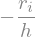

In [3]:
eq_im_i = factor(integrate((-1/h)*(r-rim)/h + r*(-1/h)*(1/h), (r, rim, ri)))
eq_im_i = eq_im_i.subs(ri - rim, h)
eq_im_i

In [4]:
eq_i_i_0 = factor(integrate((1/h)*(r-rim)/h + r*(1/h)*(1/h), (r, rim, ri)))
eq_i_i_0 = eq_i_i_0.subs(ri - rim, h)
eq_i_i_0

In [5]:
eq_i_i_1 = factor(integrate((-1/h)*(rip - r)/h + r*(-1/h)*(-1/h), (r, ri, rip)))
eq_i_i_1 = eq_i_i_1.subs(rip - ri, h)
eq_i_i_1

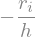

In [6]:
eq_ip_i = factor(integrate((1/h)*(rip - r)/h + r*(1/h)*(-1/h), (r, ri, rip)))
eq_ip_i = eq_ip_i.subs(rip - ri, h)
eq_ip_i

Which leads to
we have to solve 3 integrals
$$
[r, \phi_{i-1}, \phi_i] = -\frac{r_i}{h}\\
[r, \phi_i, \phi_i] = 2\frac{r_i}{h}\\
[r, \phi_{i+1}, \phi_i] = -\frac{r_i}{h}\\
$$

[[ 1.          0.          0.          0.          0.        ]
 [-1.55555556  3.11111111 -1.55555556  0.          0.        ]
 [ 0.         -2.55555556  5.11111111 -2.55555556  0.        ]
 [ 0.          0.         -3.55555556  7.11111111 -3.55555556]
 [ 0.          0.          0.          0.          1.        ]]


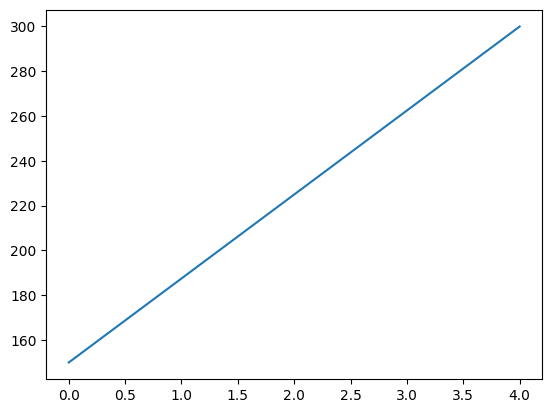

In [7]:
N = 5
r0 = 1
r1 = 10
h = (r1 - r0)/N
T0 = 150
T1 = 300

M = np.zeros((N, N))
v = np.zeros(N)

M[0, 0] = 1
M[N-1, N-1] = 1

v[0] = T0
v[N-1] = T1

for i in range(1, N-1):
    for k in range(N):
        if i == k:
            M[i, k] = 2 * (r0 + i*h)/h
        elif k == (i - 1):
            M[i, k] = -(r0 + i*h)/h
        elif k == (i + 1):
            M[i, k] = -(r0 + i*h)/h
    
print(M)
    
a = np.linalg.solve(M, v)
plt.plot(a)

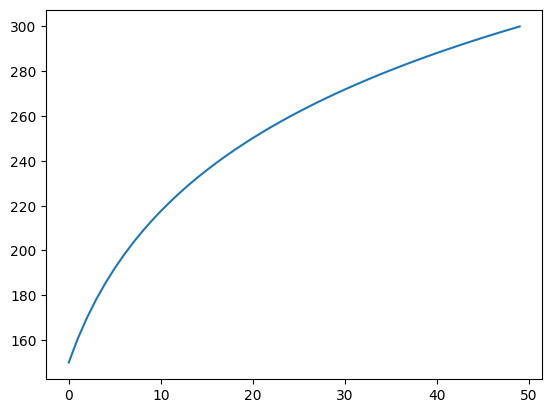

In [8]:
N = 50
r0 = 1
r1 = 10
h = (r1 - r0)/N
T0 = 150
T1 = 300

M = np.zeros((N, N))
v = np.zeros(N)

M[0, 0] = 1
M[N-1, N-1] = 1

v[0] = T0
v[N-1] = T1

for i in range(1, N-1):
    for k in range(N):
        if i == k:
            M[i, k] = -2 * (r0 + i*h)/h**2
        elif k == (i - 1):
            M[i, k] = (-1/(2*h)) + (r0 + i*h)/h**2
        elif k == (i + 1):
            M[i, k] = (1/(2*h)) + (r0 + i*h)/h**2
    
a = np.linalg.solve(M, v)
plt.plot(a)

In [9]:
r, rim, ri, rip, h = symbols('r r_{i-1} r_{i} r_{i+1} h', real=True, positive=True)

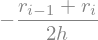

In [10]:
eq_im_i = factor(integrate(r*(-1/h)*(1/h), (r, rim, ri)))
eq_im_i.subs(ri - rim, h)

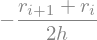

In [11]:
eq_ip_i = factor(integrate(r*(1/h)*(-1/h), (r, ri, rip)))
eq_ip_i.subs(rip - ri,h)

In [12]:
eq_i_i_l = factor(integrate(r*(1/h)*(1/h), (r, rim, ri)))
eq_i_i_l = eq_i_i_l.subs(ri - rim, h)

In [13]:
eq_i_i_r = factor(integrate(r*(1/h)*(1/h), (r, ri, rip)))
eq_i_i_r = eq_i_i_r.subs(rip - ri, h)

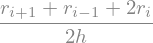

In [14]:
factor(eq_i_i_l + eq_i_i_r)

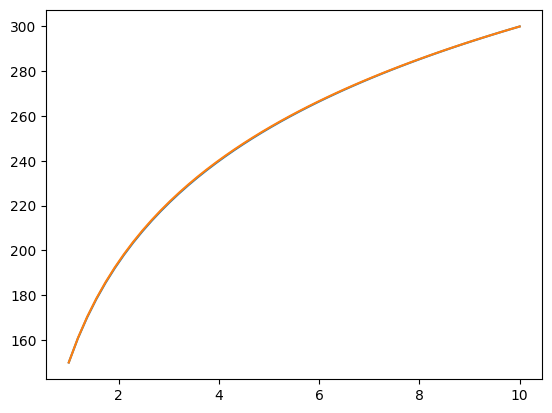

In [15]:
N = 50
r0 = 1
r1 = 10
h = (r1 - r0)/N
T0 = 150
T1 = 300

M = np.zeros((N, N))
v = np.zeros(N)

M[0, 0] = 1
M[N-1, N-1] = 1

v[0] = T0
v[N-1] = T1

for i in range(1, N-1):
    for k in range(N):
        if i == k:
            M[i, k] = ((r0 + (i+1)*h) + 2*(r0 + i*h) + (r0 + (i-1)*h))/(2*h)
        elif k == (i - 1):
            M[i, k] = -((r0 + i*h) + (r0 + (i - 1)*h))/(2*h)
        elif k == (i + 1):
            M[i, k] = -((r0 + i*h) + (r0 + (i + 1)*h))/(2*h)
    
a = np.linalg.solve(M, v)

c = (T1 - T0)/np.log(r1/r0)
r = np.linspace(r0, r1, N)
T = [T0 + c*np.log(ri/r0) for ri in r]

plt.plot(r, a)
plt.plot(r, T)

In [16]:
r, rim, ri, rip, h = symbols('r r_{i-1} r_{i} r_{i+1} h', real=True, positive=True)

In [17]:
phi_im = (r-rim)/h
phi_ip = (rip-r)/h

equation
$$
\int \phi'_i \phi_i dr = 0
$$

In [18]:
factor(integrate(-(1/h)*phi_im, (r, rim, ri))).subs(ri - rim, h)

In [19]:
factor(integrate((1/h)*phi_ip, (r, ri, rip))).subs(rip - ri, h)

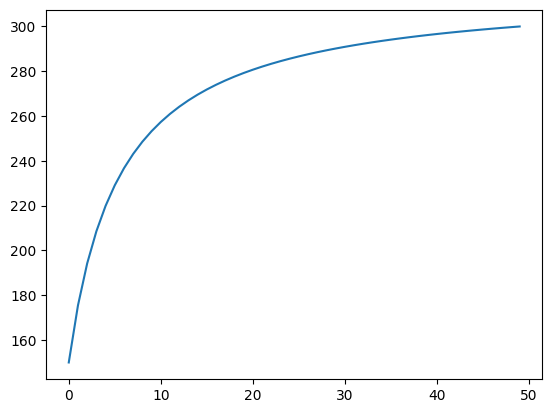

In [20]:
N = 50
r0 = 1
r1 = 10
h = (r1 - r0)/N
T0 = 150
T1 = 300

M = np.zeros((N, N))
v = np.zeros(N)

M[0, 0] = 1
M[N-1, N-1] = 1

v[0] = T0
v[N-1] = T1

for i in range(1, N-1):
    for k in range(N):
        if i == k:
            M[i, k] = ((r0 + (i+1)*h) + 2*(r0 + i*h) + (r0 + (i-1)*h))/(2*h)
        elif k == (i - 1):
            M[i, k] = -((r0 + i*h) + (r0 + (i - 1)*h))/(2*h) +0.5
        elif k == (i + 1):
            M[i, k] = -((r0 + i*h) + (r0 + (i + 1)*h))/(2*h) -0.5
    
a = np.linalg.solve(M, v)
plt.plot(a)